In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mục mới

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import accuracy_score
from scipy.stats import norm, skew
from sklearn import metrics
from copy import deepcopy
df=pd.read_csv("diabetes.csv");
print(df)






      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0               6      148             72             35        0  33.600000   
1               1       85             66             29        0  26.600000   
2               8      183             64              0        0  23.300000   
3               1       89             66             23       94  28.100000   
4               0      137             40             35      168  43.100000   
...           ...      ...            ...            ...      ...        ...   
1763           11      198             54             42      170  18.826045   
1764            0      165             72             26      233  22.485072   
1765            8      172             92             30      155  38.678053   
1766            9      104             64             57      264  20.276718   
1767           13      144             74             33       89  42.222671   

      DiabetesPedigreeFunction  Age  Ou

In [3]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness      Insulin  \
count  1768.000000  1768.00000    1768.000000    1768.000000  1768.000000   
mean      5.622738   128.74491      74.928167      28.341629   118.325226   
std       4.236458    35.94459      18.934670      16.565209   105.859631   
min       0.000000     0.00000       0.000000       0.000000     0.000000   
25%       2.000000   100.00000      64.000000      17.000000    14.000000   
50%       5.000000   125.00000      74.000000      29.000000   105.000000   
75%       9.000000   158.00000      87.000000      41.000000   193.000000   
max      17.000000   199.00000     122.000000      99.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  1768.000000               1768.000000  1768.000000  1768.000000  
mean     31.628386                  0.907201    44.909502     0.441742  
std       7.821295                  0.688942    20.189110     0.496735  
min       0.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1768 non-null   int64  
 1   Glucose                   1768 non-null   int64  
 2   BloodPressure             1768 non-null   int64  
 3   SkinThickness             1768 non-null   int64  
 4   Insulin                   1768 non-null   int64  
 5   BMI                       1768 non-null   float64
 6   DiabetesPedigreeFunction  1768 non-null   float64
 7   Age                       1768 non-null   int64  
 8   Outcome                   1768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 124.4 KB


In [5]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1763,False,False,False,False,False,False,False,False,False
1764,False,False,False,False,False,False,False,False,False
1765,False,False,False,False,False,False,False,False,False
1766,False,False,False,False,False,False,False,False,False


In [ ]:
####################################### Câu 1:

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

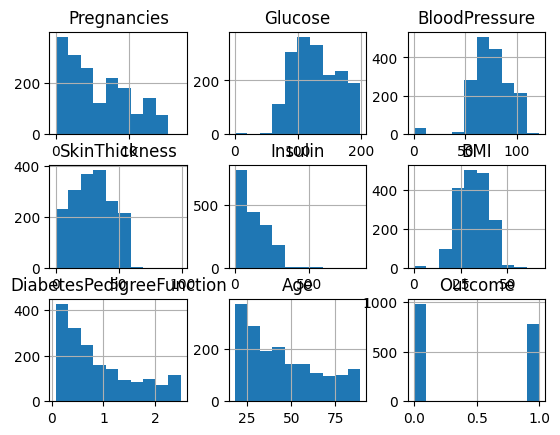

In [6]:
df_new = df.dropna()
# loại bỏ các dòng NAN
df_new.hist()

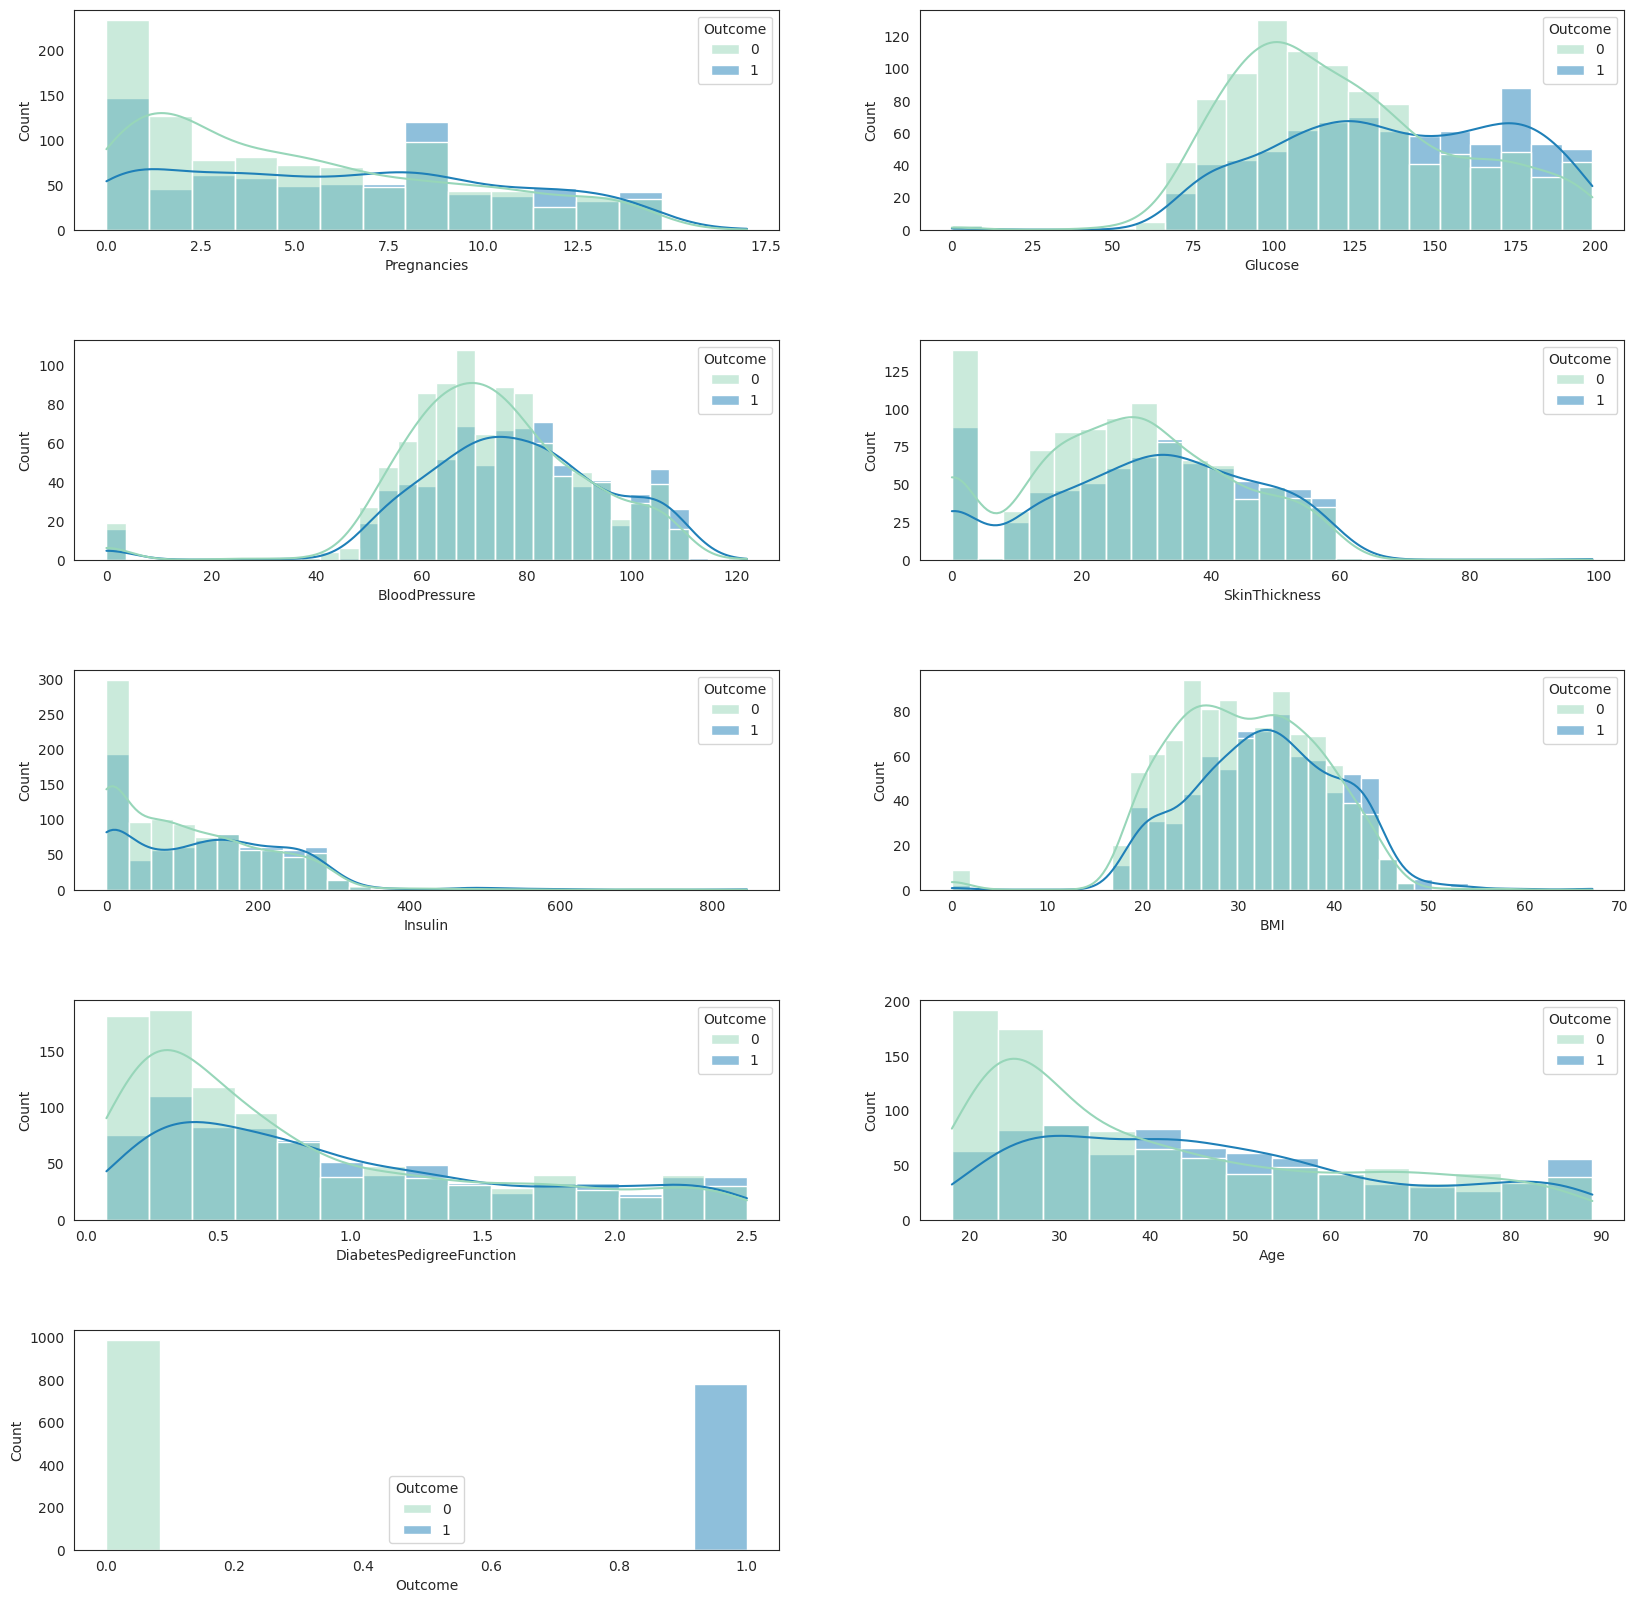

In [8]:
# Hiện thức hóa dữ liệu trên trường outcome
feature_names2 = [cname for cname in df.columns]
plt.figure(figsize = (20,20))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names2:
    plt.subplot(5,2,i)
    sns.histplot( data=df, x=name, hue="Outcome", kde=True, palette="YlGnBu" )
    i = i + 1

<Axes: >

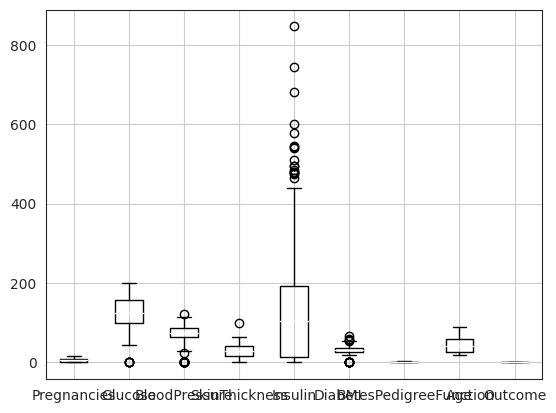

In [ ]:
df_new.boxplot()

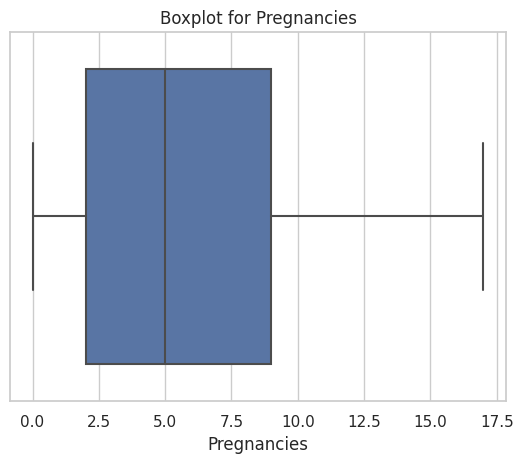

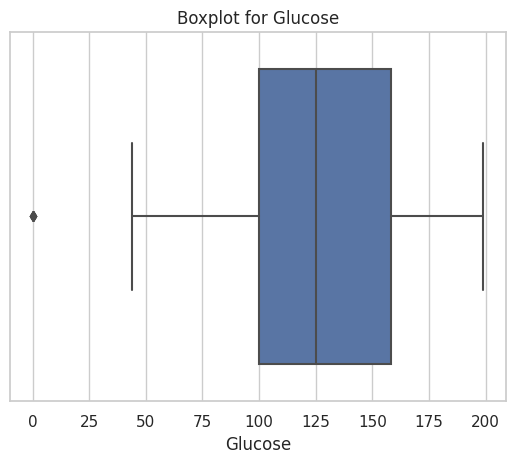

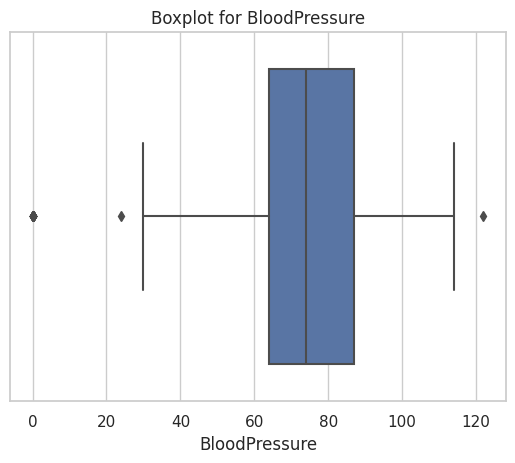

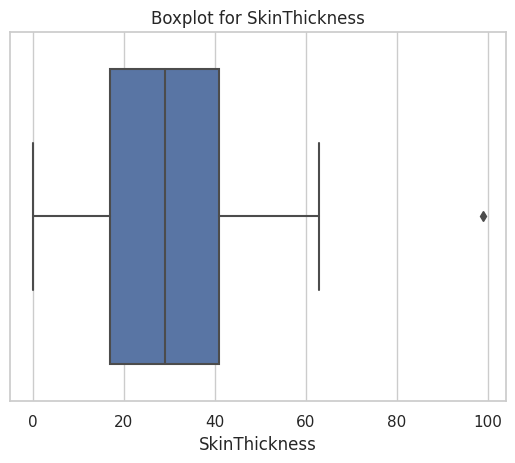

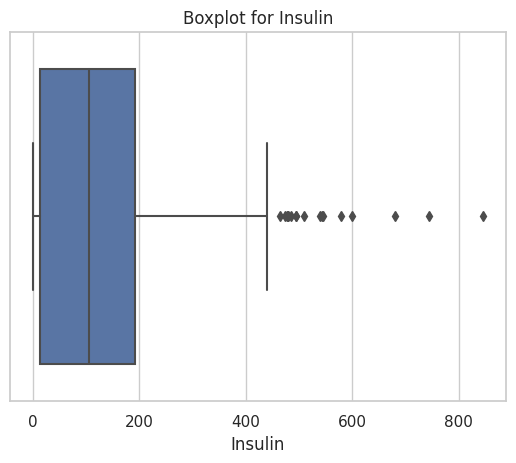

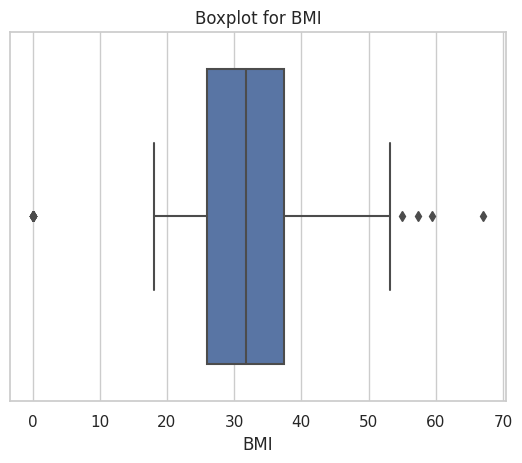

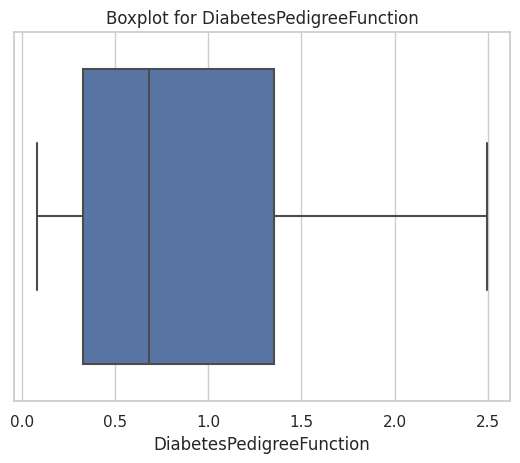

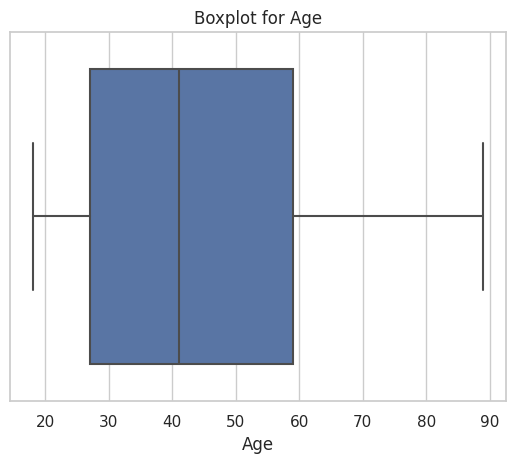

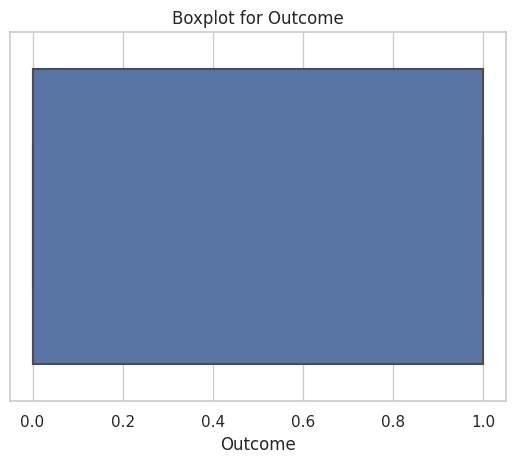

In [ ]:
# Outlier Values
for c in df_new.columns:
    plt.figure()
    sns.boxplot(x=c, data=df_new, orient="h")  # Thay đổi orient thành "h"
    plt.title(f'Boxplot for {c}')

plt.show()

Mối tương quan của tập dữ liệu với trường OutCome(0 là không mắc bệnh,1 là mắc bệnh)

In [9]:
sns.pairplot(df_new, hue = "Outcome")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


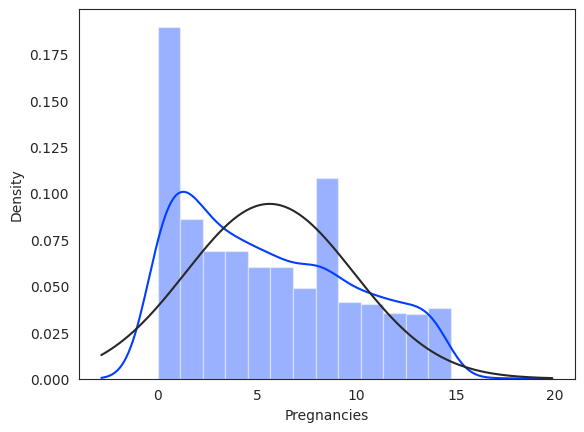

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


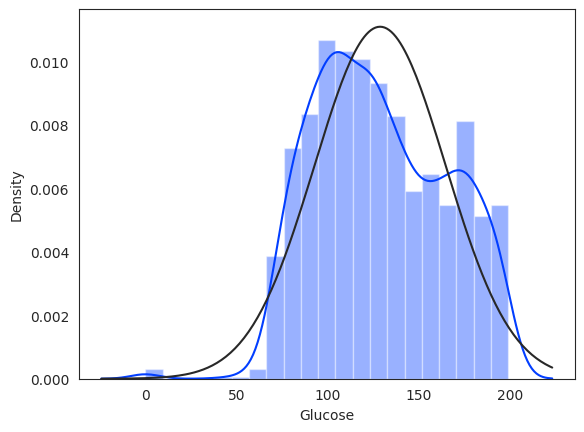

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


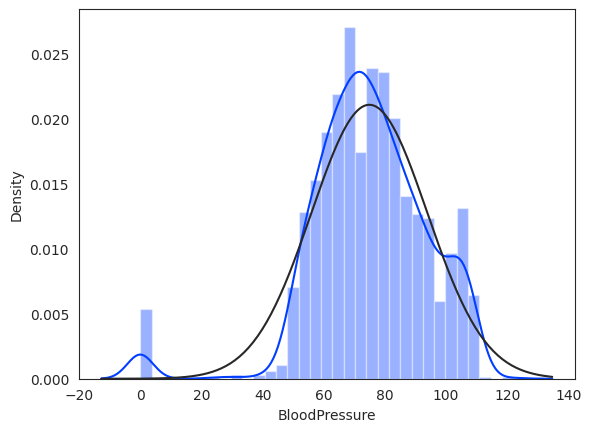

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


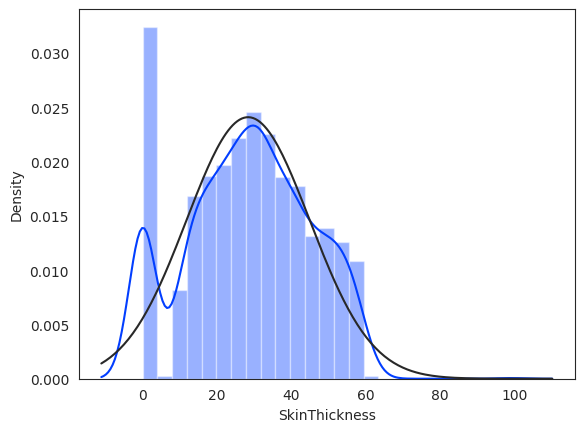

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


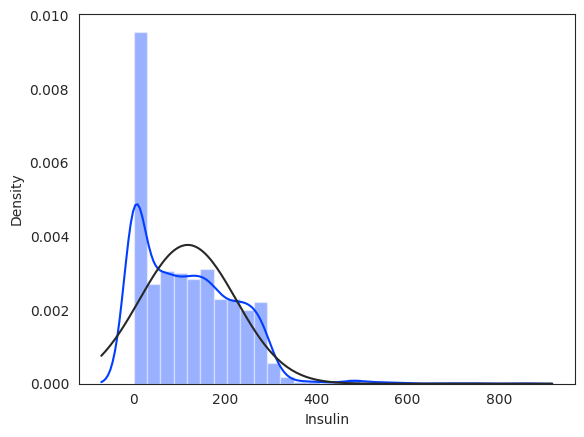

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


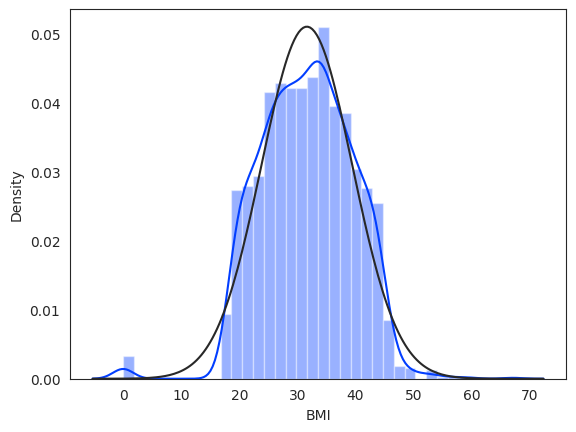

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


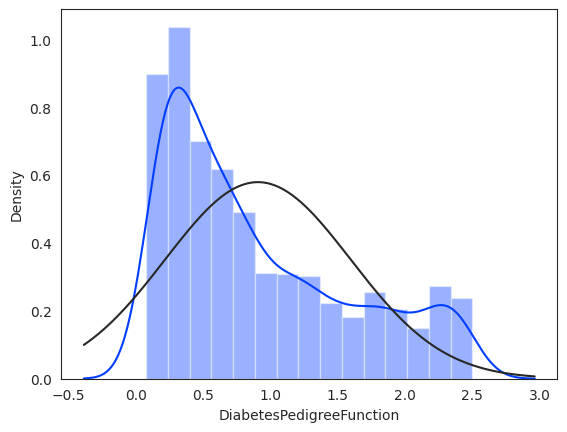

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


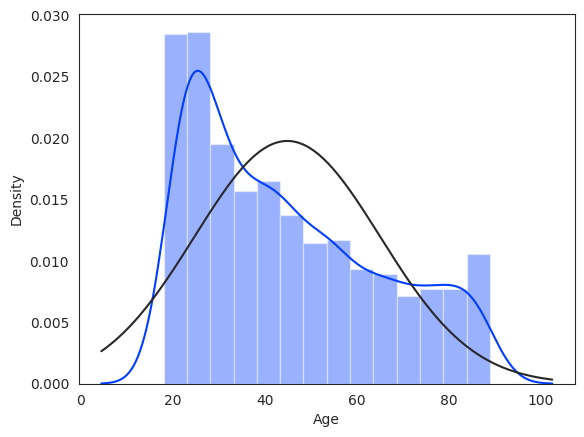

<ipython-input-10-3b9c5076ec92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], fit = norm)


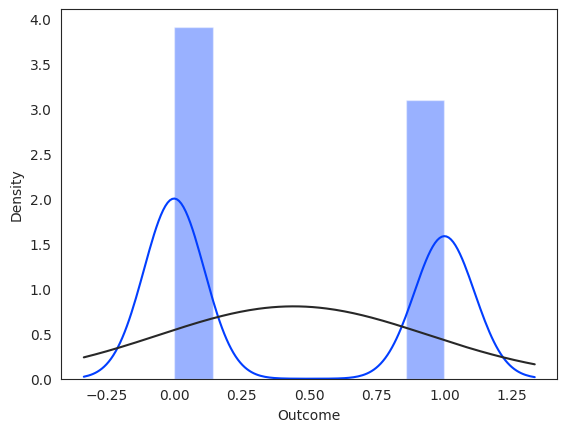

In [10]:
# Phân bố dữ liệu theo cột dựa trên tập dữ liệu mới
for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i], fit = norm)
    plt.show()

Biểu đồ kiểu tra dữ liệu có tuân theo phân phối chuẩn hay không.Nếu càng gần với đường chéo thì đúng còn xa ra thì không

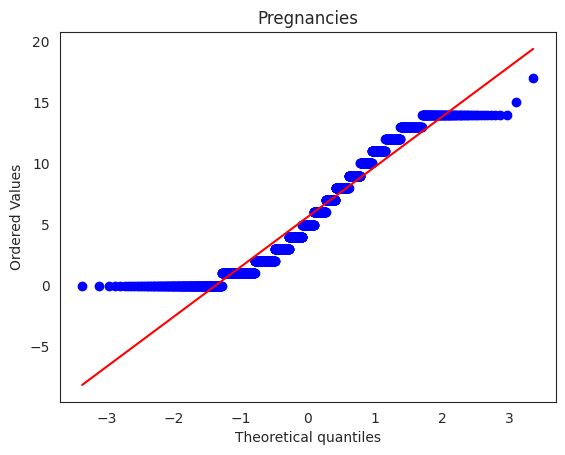

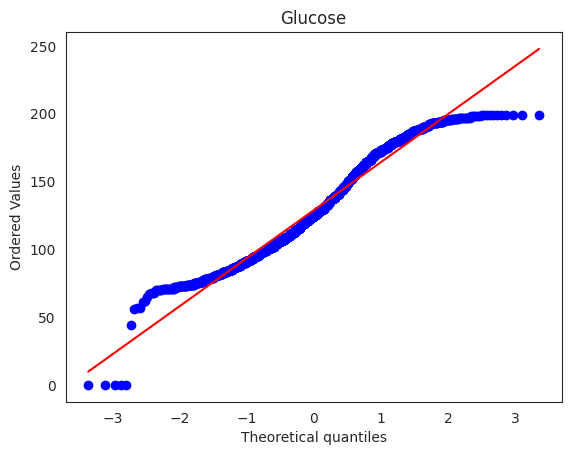

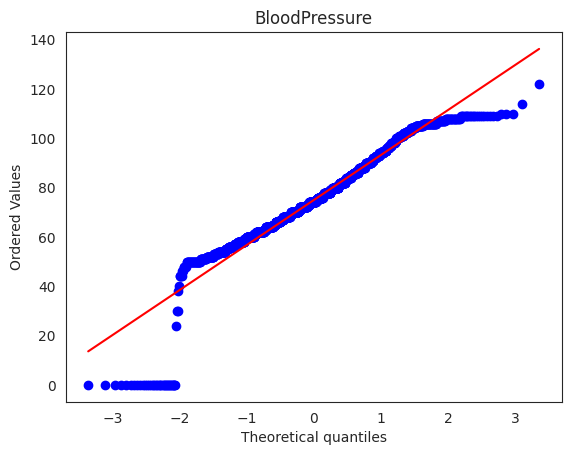

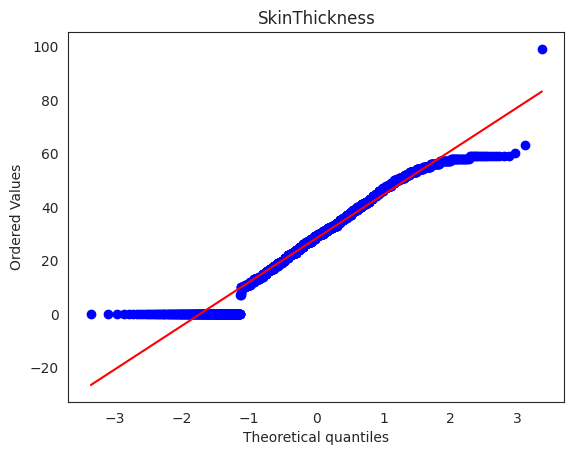

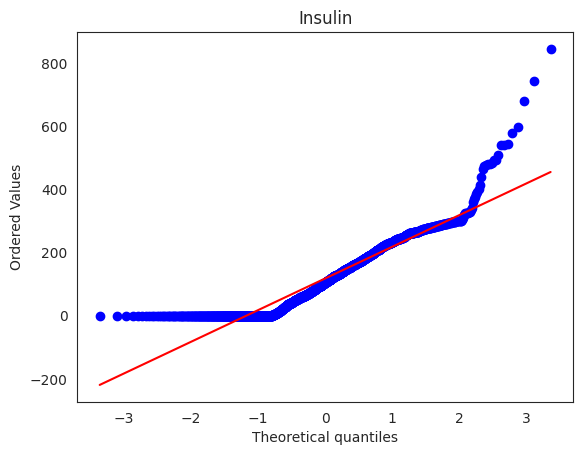

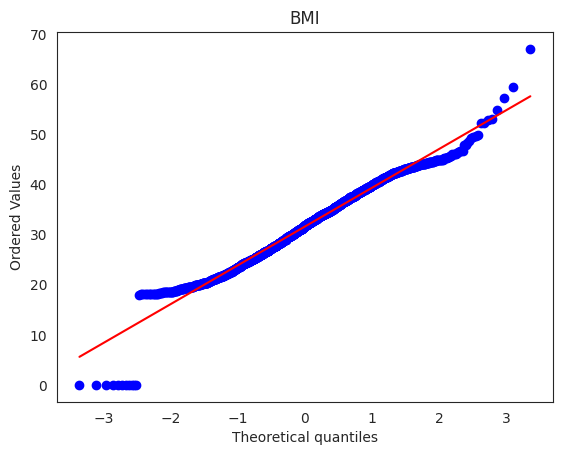

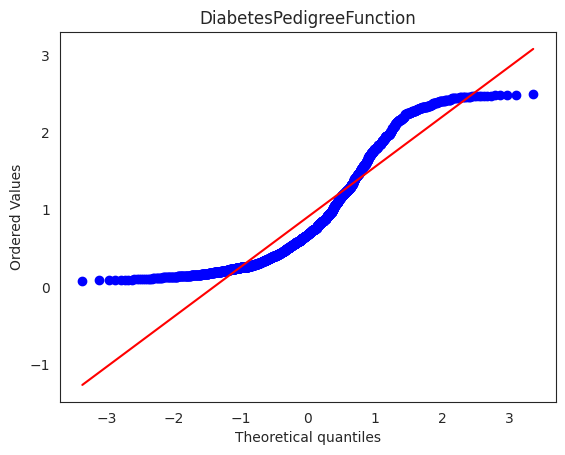

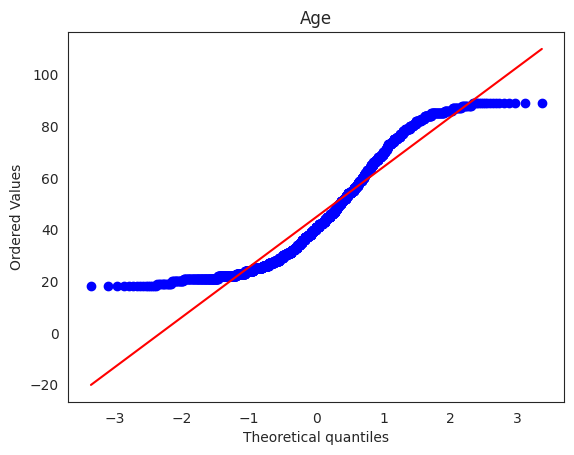

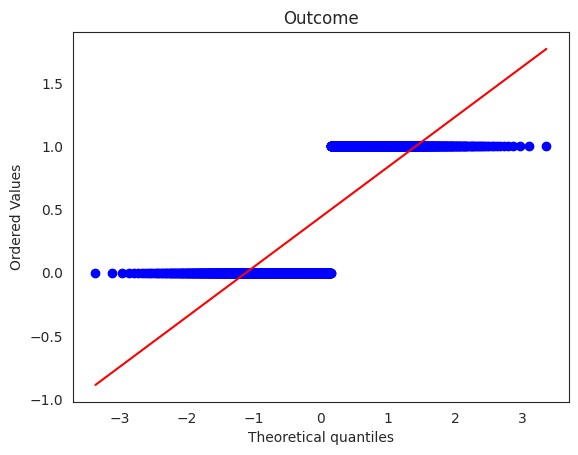

In [11]:
for i in df.columns:
    plt.figure()
    stats.probplot(df_new[i], plot = plt)
    plt.title(i)
    plt.show()

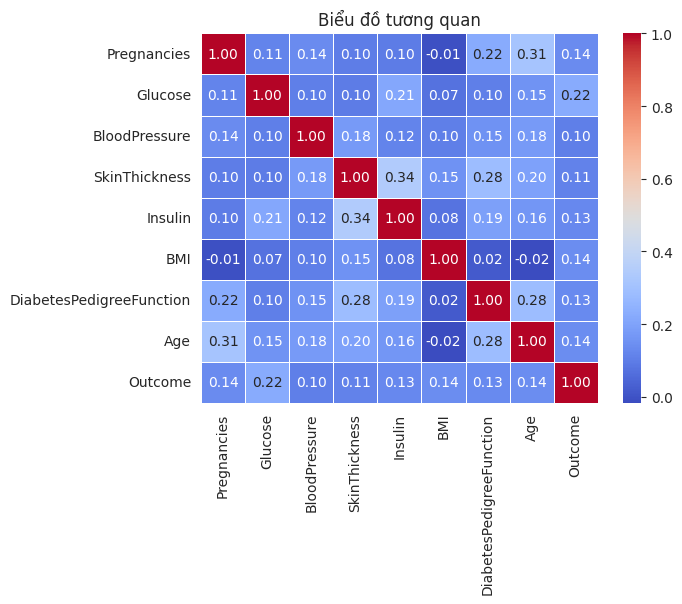

In [ ]:
#Vẽ biểu đồ chuẩn đoán bệnh biểu diễn độ tương quan giữa các thuộc tính
# Tạo ma trận tương quan
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Biểu đồ tương quan')
plt.show()

In [ ]:
# sns.set(style="whitegrid")

# # Vẽ scatter plot cho các cặp thuộc tính
# sns.pairplot(df_new, hue='Outcome')
# plt.show()

In [16]:
features = df_new.drop("Outcome", axis=1)
target = df_new["Outcome"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Chọn mô hình và đào tạo
k = 5  # KNN = 5 ---> it means, choose 5 sample and train model by this 5 sample.
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)
print ('Accuracy fro k=5:' , metrics.accuracy_score(y_test , y_pred))

# Chọn mô hình và đào tạo
k = 3  # KNN = 5 ---> it means, choose 5 sample and train model by this 5 sample.
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)
print ('Accuracy for k=3:' , metrics.accuracy_score(y_test , y_pred))

# Chọn mô hình và đào tạo
k = 9  # KNN = 5 ---> it means, choose 5 sample and train model by this 5 sample.
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)
print ('Accuracy for k=9:' , metrics.accuracy_score(y_test , y_pred))


# create a loop to find highest accuracy
k = 20
Acc = np.zeros ((k))
# this give me a empty matris it has 20 position (number of k) for complate it after end of loop!
# 1 is first k & k+1 is last k (+1 is because of runnig indexes is (1-19) and we want (1-20))
for i in range (1 , k+1):
    clf = KNeighborsClassifier (n_neighbors = i) # this is a method ---> i=1 & loop , i=2 & loop , ... , i=20
    clf.fit (X_train , y_train.ravel ())
    y_pred = clf.predict(X_test)
    Acc [i-1] = metrics.accuracy_score(y_test , y_pred)
    # matris started from 0 but k start from 1 ---> so i-1 to read one before and calculate accuracy.

print("Min Accuracy: ",np.min (Acc))
print ("Max Accuracy:",np.max (Acc))


Accuracy fro k=5: 0.5875706214689266
Accuracy for k=3: 0.5706214689265536
Accuracy for k=9: 0.5819209039548022
Min Accuracy:  0.5706214689265536
Max Accuracy: 0.6045197740112994


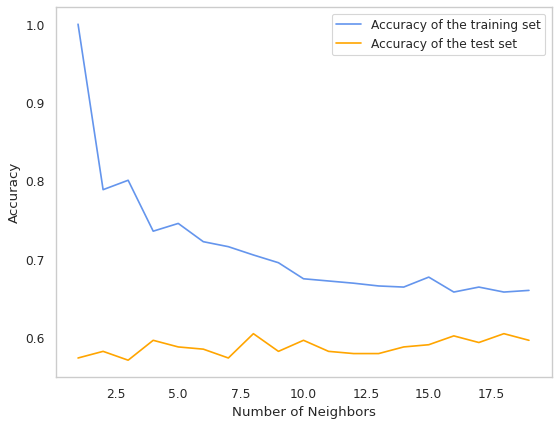

In [17]:
# Biểu đồ thể hiện sự chính xác

training_acc = []
test_acc = []
# empty  matris, befor loop , for writing numbers in that matris.
neighbors_setting = range (1,20) # it is a values
for n_neighbors in neighbors_setting :
    knn = KNeighborsClassifier (n_neighbors = n_neighbors) # this is a method ---> i=1 & loop , i=2 & loop , ... , i=20
    knn.fit (X_train , y_train.ravel ())
    training_acc.append (knn.score (X_train , y_train))
    test_acc .append (knn.score (X_test , y_test))
plt.figure (figsize = (8,6) , dpi = 80)
plt.plot(neighbors_setting , training_acc , label = 'Accuracy of the training set' ,  color = 'cornflowerblue')
plt.plot(neighbors_setting , test_acc , label = 'Accuracy of the test set' , color = 'orange')
plt.xlabel ('Number of Neighbors')
plt.ylabel ('Accuracy')
plt.legend()
plt.grid()
plt.show ()

In [ ]:
#tiền xử lý

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Xử lý dữ liệu thiếu (ở đây giả sử điền giá trị trung bình cho NaN)
df_new.fillna(df.mean(), inplace=True)

# Xử lý dữ liệu ngoại lệ (ở đây giả sử loại bỏ các mẫu có Insulin lớn hơn 500)
df_new = df_new[df_new['Insulin'] <= 500]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Checking columns after preprocessing
print(df.columns)

# Convert categorical variable 'Outcome' to dummy/indicator variables
df = pd.get_dummies(df, columns=['Outcome'], drop_first=True)

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Outcome_1', axis=1), df_new['Outcome_1'], test_size=0.2, random_state=42)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
####################### Câu 2:

In [ ]:
## mô tả hình anh, kiên trúc mạng
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Dữ liệu đầu vào và đầu ra
X = np.array(df_new)

y = np.random.randint(2, size=(1759, 1))

# Khởi tạo trọng số ngẫu nhiên
np.random.seed(42)
input_size = X.shape[1]
hidden_size = 8  # Số lượng nơ-ron trong lớp ẩn
output_size = 1

weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Huấn luyện mô hình (chỉ sử dụng một epoch và giả sử learning rate là 0.01)
learning_rate = 0.01

for epoch in range(1):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Chuyển đổi y để có cùng hình dạng với predicted_output
    y_reshaped = y.reshape(predicted_output.shape)

    # Tính lỗi
    error = y_reshaped - predicted_output

    # Backpropagation
    output_error = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Cập nhật trọng số
    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    weights_input_hidden += X.T.dot(hidden_layer_error) * learning_rate

# In ra trọng số sau khi huấn luyện
print("Trọng số từ input đến hidden layer:")
print(weights_input_hidden)
print("\nTrọng số từ hidden layer đến output:")
print(weights_hidden_output)


Trọng số từ input đến hidden layer:
[[0.3746061  0.96452005 0.74147055 0.60867939 0.16322036 0.15678037
  0.06174874 0.86746541]
 [0.60112876 0.7102582  0.02200262 0.97392798 0.83264194 0.21247006
  0.18221382 0.18361773]
 [0.30420325 0.5203057  0.42797476 0.28735271 0.60602735 0.13931106
  0.29099356 0.36563443]
 [0.45607786 0.78493414 0.19617175 0.51416105 0.59198218 0.04639855
  0.60752568 0.17022995]
 [0.06503844 0.95149058 0.96371604 0.80870824 0.30187397 0.09741484
  0.68451826 0.44011314]
 [0.12205743 0.49586262 0.03724305 0.91057938 0.2616273  0.66297658
  0.31208872 0.52010259]
 [0.5467892  0.19105229 0.97783767 0.78516102 0.95044494 0.89634647
  0.60300369 0.92338675]
 [0.0884868  0.19688166 0.04486535 0.32710998 0.38762083 0.27158495
  0.83259278 0.35658486]
 [0.28069454 0.51498394 0.11544312 0.77814723 0.04624127 0.98403998
  0.75958334 0.1942595 ]]

Trọng số từ hidden layer đến output:
[[-0.24347386]
 [ 0.56120399]
 [ 0.47075115]
 [ 0.46960504]
 [ 0.53154314]
 [-0.19894871

In [ ]:
## Xây dựng mô hình
import numpy as np

# Dữ liệu mẫu
data = np.array(df_new);

# Tách dữ liệu thành đặc trưng (X) và nhãn (y)
X = data[:, :-1]
y = data[:, -1]

# Chuẩn hóa dữ liệu
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Thêm cột bias cho ma trận đặc trưng
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

# Hàm kích hoạt Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm loss - Binary Crossentropy
def binary_crossentropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Gradient của hàm loss theo dự đoán (y_pred)
def binary_crossentropy_gradient(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Hàm tính đạo hàm Sigmoid
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Hàm lan truyền ngược
def backward(X, y, weights, learning_rate):
    m = X.shape[0]
    input_size = X.shape[1]  # Thêm dòng này để định nghĩa input_size
    # Forward pass
    z = np.dot(X, weights.T)  # Chuyển vị weights ở đây
    a = sigmoid(z)

    # Compute loss
    loss = binary_crossentropy(y, a)

    # Backward pass
    dz = binary_crossentropy_gradient(y, a) * sigmoid_gradient(z)
    dw = np.dot(X.T, dz) / m

    # Update weights
    weights = weights - learning_rate * dw.T  # Chuyển vị lại để weights có kích thước đúng

    return loss, weights, input_size  # Thêm input_size vào tuple để trả về


# Hàm huấn luyện
def train(X, y, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = 1

    # Khởi tạo trọng số ngẫu nhiên
    weights = np.random.rand(1, input_size)

    # Huấn luyện mô hình
    for epoch in range(epochs):
        loss, weights, input_size = backward(X, y, weights, learning_rate)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights

# Huấn luyện mô hình
epochs = 1000
learning_rate = 0.01
trained_weights = train(X_normalized, y, epochs, learning_rate)

# Dự đoán
predictions = sigmoid(np.dot(X_normalized, trained_weights.T))
print("Predictions:", predictions)


Epoch 0, Loss: 1.2062586415769916
Epoch 100, Loss: 0.7934637986574784
Epoch 200, Loss: 0.5170349792942113
Epoch 300, Loss: 0.3552072846066996
Epoch 400, Loss: 0.263736412356252
Epoch 500, Loss: 0.20905293411528467
Epoch 600, Loss: 0.173478246295454
Epoch 700, Loss: 0.14853176300303497
Epoch 800, Loss: 0.1300082348417276
Epoch 900, Loss: 0.11566093437791042
Predictions: [[0.9082528  0.10098089 0.9082528  ... 0.9082528  0.9082528  0.10098089]
 [0.88857208 0.08742863 0.88857208 ... 0.88857208 0.88857208 0.08742863]
 [0.90566899 0.09547758 0.90566899 ... 0.90566899 0.90566899 0.09547758]
 ...
 [0.93579654 0.13180663 0.93579654 ... 0.93579654 0.93579654 0.13180663]
 [0.89426153 0.0864667  0.89426153 ... 0.89426153 0.89426153 0.0864667 ]
 [0.91103568 0.10456309 0.91103568 ... 0.91103568 0.91103568 0.10456309]]


Epoch 0, Loss: 0.9723794475205593
Epoch 100, Loss: 0.6502832926183131
Epoch 200, Loss: 0.44775755092347364
Epoch 300, Loss: 0.32715324229731435
Epoch 400, Loss: 0.25358658464427875
Epoch 500, Loss: 0.20589414796872735
Epoch 600, Loss: 0.1729670618012287
Epoch 700, Loss: 0.14899601888029415
Epoch 800, Loss: 0.1307958968530896
Epoch 900, Loss: 0.1165144268482976
Predictions: [[0.89403138 0.08995672 0.89403138 ... 0.89403138 0.89403138 0.08995672]
 [0.88833392 0.08300985 0.88833392 ... 0.88833392 0.88833392 0.08300985]
 [0.86196641 0.06582988 0.86196641 ... 0.86196641 0.86196641 0.06582988]
 ...
 [0.92663344 0.13051658 0.92663344 ... 0.92663344 0.92663344 0.13051658]
 [0.88126177 0.07771966 0.88126177 ... 0.88126177 0.88126177 0.07771966]
 [0.90869905 0.10640649 0.90869905 ... 0.90869905 0.90869905 0.10640649]]


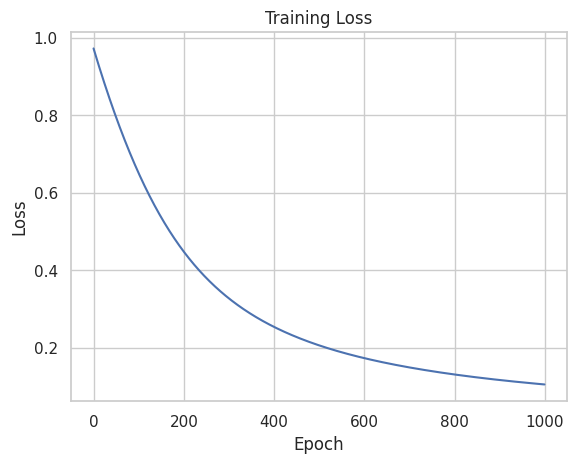

In [ ]:
## đồ thị biểu diển
import matplotlib.pyplot as plt

# Hàm lan truyền ngược
def backward(X, y, weights, learning_rate):
    m = X.shape[0]
    input_size = X.shape[1]  # Thêm dòng này để định nghĩa input_size
    # Forward pass
    z = np.dot(X, weights.T)  # Chuyển vị weights ở đây
    a = sigmoid(z)

    # Compute loss
    loss = binary_crossentropy(y, a)

    # Backward pass
    dz = binary_crossentropy_gradient(y, a) * sigmoid_gradient(z)
    dw = np.dot(X.T, dz) / m

    # Update weights
    weights = weights - learning_rate * dw.T  # Chuyển vị lại để weights có kích thước đúng

    return loss, weights, input_size  # Thêm input_size vào tuple để trả về

# Hàm huấn luyện
def train(X, y, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = 1

    # Khởi tạo trọng số ngẫu nhiên
    weights = np.random.rand(1, input_size)

    # List để lưu giá trị loss sau mỗi epoch
    loss_history = []

    # Huấn luyện mô hình
    for epoch in range(epochs):
        loss, weights, input_size = backward(X, y, weights, learning_rate)

        # Lưu giá trị loss
        loss_history.append(loss)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, loss_history

# Huấn luyện mô hình
epochs = 1000
learning_rate = 0.01
trained_weights, loss_history = train(X_normalized, y, epochs, learning_rate)

# Dự đoán
predictions = sigmoid(np.dot(X_normalized, trained_weights.T))
print("Predictions:", predictions)

# Vẽ biểu đồ loss
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
# tinh chỉnh và đánh giá
#Dự đoán trên bộ kiểm tra
def predict(X, weights):
    return sigmoid(np.dot(X, weights.T))
# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test


# Đánh giá mô hình
def evaluate_multiclass(y_true, y_pred):
    # Chuyển đổi dự đoán thành các nhãn dự đoán (ví dụ, lớp có xác suất cao nhất)
    predicted_labels = np.argmax(y_pred, axis=1)

    # Độ chính xác
    accuracy = np.mean(predicted_labels == y_true)

    return accuracy

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split_custom(X_normalized, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên bộ huấn luyện
trained_weights, loss_history = train(X_train, y_train, epochs=1000, learning_rate=0.01)

# Dự đoán trên bộ kiểm tra
predictions_test = predict(X_test, trained_weights)

# Đánh giá mô hình cho bài toán multiclass
accuracy_multiclass = evaluate_multiclass(y_test, predictions_test)

# In kết quả
print(f'Accuracy on test set (multiclass): {accuracy_multiclass}')


Epoch 0, Loss: 1.0168787053783725
Epoch 100, Loss: 0.6706084253665746
Epoch 200, Loss: 0.458843506534794
Epoch 300, Loss: 0.3350718334040908
Epoch 400, Loss: 0.25952829881804895
Epoch 500, Loss: 0.21033682059529543
Epoch 600, Loss: 0.17629270464251906
Epoch 700, Loss: 0.15150240853000027
Epoch 800, Loss: 0.13270230030547023
Epoch 900, Loss: 0.11797842658505744
Accuracy on test set (multiclass): 0.4914772727272727


In [ ]:
# Khá thấp nên sẽ tăng epochs=2000, learning_rate=0.1 lên.Để đánh giá lại mô hình này!!!!!!!!

In [ ]:
# tinh chỉnh và đánh giá
#Dự đoán trên bộ kiểm tra
def predict(X, weights):
    return sigmoid(np.dot(X, weights.T))
# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test


# Đánh giá mô hình
def evaluate_multiclass(y_true, y_pred):
    # Chuyển đổi dự đoán thành các nhãn dự đoán (ví dụ, lớp có xác suất cao nhất)
    predicted_labels = np.argmax(y_pred, axis=1)

    # Độ chính xác
    accuracy = np.mean(predicted_labels == y_true)

    return accuracy

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split_custom(X_normalized, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên bộ huấn luyện
trained_weights, loss_history = train(X_train, y_train, epochs=1000, learning_rate=0.1)

# Dự đoán trên bộ kiểm tra
predictions_test = predict(X_test, trained_weights)

# Đánh giá mô hình cho bài toán multiclass
accuracy_multiclass = evaluate_multiclass(y_test, predictions_test)

# In kết quả
print(f'Accuracy on test set (multiclass): {accuracy_multiclass}')


Epoch 0, Loss: 1.0168787053783725
Epoch 100, Loss: 0.10539508956047156
Epoch 200, Loss: 0.05231618689169975
Epoch 300, Loss: 0.03463999716475349
Epoch 400, Loss: 0.025851431820343187
Epoch 500, Loss: 0.02060472015379936
Epoch 600, Loss: 0.01712140376093354
Epoch 700, Loss: 0.014641842898405399
Epoch 800, Loss: 0.012787506293935259
Epoch 900, Loss: 0.011348758177484004
Accuracy on test set (multiclass): 0.4971590909090909


In [ ]:
############### Cau 3:

In [ ]:
data_test = {
    ## data thực
}
# Sử dụng dữ liệu kiểm tra thực tế (giả sử bạn đã chia dữ liệu thành tập huấn luyện và tập kiểm tra)
X_test = np.array(df_test)  # df_test là DataFrame chứa dữ liệu kiểm tra thực tế

# Thực hiện forward pass để đưa ra dự đoán
hidden_layer_input_test = np.dot(X_test, weights_input_hidden)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
predicted_output_test = sigmoid(output_layer_input_test)

# In ra dự đoán
print("Dự đoán của mô hình trên dữ liệu kiểm tra:")
print(predicted_output_test)


ValueError: ignored